<a href="https://colab.research.google.com/github/kennyerss/csci451-project/blob/main/code/CS451.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#need to import Drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# import os 

# # Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# # your files will be saved in your Google Drive!

# # the base Google Drive directory
# root_dir = "/content/drive/Shareddrives/"

# # choose where you want your project files to be saved
# project_folder = "CSCI451/"

# def create_and_set_working_directory(project_folder):
#   # check if your project folder exists. if not, it will be created.
#   if os.path.isdir(root_dir + project_folder) == False:
#     os.mkdir(root_dir + project_folder)
#     print(root_dir + project_folder + ' did not exist but was created.')

#   # change the OS to use your project folder as the working directory
#   os.chdir(root_dir + project_folder)

#   # create a test file to make sure it shows up in the right place
#   !touch 'new_file_in_working_directory.txt'
#   print('\nYour working directory was changed to ' + root_dir + project_folder + \
#         "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

# create_and_set_working_directory(project_folder)

## Image Visualization

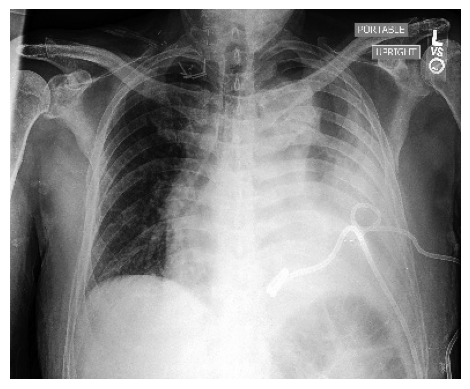

In [ ]:
#This just will show the images

import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/Shareddrives/CSCI451/train/patient00142/study3/view1_frontal.jpg')
#img = cv2.imread('/content/drive/MyDrive/chexpert_small/train/patient00974/study1/view1_frontal.jpg')
# cv2.imshow()
plt.imshow(img)
plt.axis("off")
plt.show()

## File reading tests

In [ ]:
from os import walk
for (dirpath, dirnames, filenames) in walk("../input/"):
    print("Directory path: ", dirpath)
    print("Folder name: ", dirnames)
#     print("File name: ", filenames)

In [ ]:
# DO NOT RUN THIS

"""
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

dataset = datasets.ImageFolder('/content/drive/MyDrive/chexpert_small/train/', transform=transform)
"""

"\nimport torch\nfrom torchvision import datasets, transforms\n\ntransform = transforms.Compose([transforms.Resize(255),\n                                 transforms.CenterCrop(224),\n                                 transforms.ToTensor()])\n\ndataset = datasets.ImageFolder('/content/drive/MyDrive/chexpert_small/train/', transform=transform)\n"

## Data Analysis

df_train_race holds our data set of patient ID and race.

In [ ]:
# import our race data set and load as a dataframe

import pandas as pd

df_train_race = pd.read_excel('/content/drive/Shareddrives/CSCI451/chexpert_race.xlsx')
df_train_race

,PATIENT,GENDER,AGE_AT_CXR,PRIMARY_RACE,ETHNICITY
0,patient24428,Male,61,White,Non-Hispanic/Non-Latino
1,patient48289,Female,39,Other,Hispanic/Latino
2,patient33856,Female,81,White,Non-Hispanic/Non-Latino
3,patient41673,Female,42,Unknown,Unknown
4,patient48493,Male,71,White,Non-Hispanic/Non-Latino
...,...,...,...,...,...
65396,patient65702,Male,1,Other,Hispanic/Latino
65397,patient04979,Female,27,Other,Hispanic/Latino
65398,patient11445,Female,29,Unknown,Unknown
65399,patient23235,Female,41,"Other, Hispanic",Hispanic/Latino


In [ ]:
# print the unique labels for race - we need to make some determinations here
print(df_train_race['PRIMARY_RACE'].unique())
print((df_train_race['PRIMARY_RACE'] == 'White, non-Hispanic').sum())

['White' 'Other' 'Unknown' 'White, non-Hispanic' 'Asian' nan
 'Black or African American' 'Black, non-Hispanic' 'Other, Hispanic'
 'Race and Ethnicity Unknown' 'Asian, non-Hispanic'
 'Pacific Islander, non-Hispanic'
 'Native Hawaiian or Other Pacific Islander' 'Other, non-Hispanic'
 'Patient Refused' 'White, Hispanic' 'Black, Hispanic' 'Asian, Hispanic'
 'American Indian or Alaska Native' 'Native American, Hispanic'
 'Native American, non-Hispanic' 'Pacific Islander, Hispanic'
 'Asian - Historical Conv' 'White or Caucasian']
6556


In [ ]:
#print the unique labels for ethnicity
print(df_train_race['ETHNICITY'].unique())

['Non-Hispanic/Non-Latino' 'Hispanic/Latino' 'Unknown' nan
 'Patient Refused' 'Hispanic' 'Not Hispanic']


In [ ]:
#subset data by the "Other" listed for Race
df_train_race[df_train_race['PRIMARY_RACE'] == 'Other']

,PATIENT,GENDER,AGE_AT_CXR,PRIMARY_RACE,ETHNICITY
1,patient48289,Female,39,Other,Hispanic/Latino
13,patient51575,Male,68,Other,Hispanic/Latino
32,patient28670,Male,63,Other,Hispanic/Latino
53,patient65275,Female,59,Other,Non-Hispanic/Non-Latino
61,patient54887,Male,74,Other,Hispanic/Latino
...,...,...,...,...,...
65386,patient33297,Female,40,Other,Hispanic/Latino
65390,patient15562,Female,50,Other,Hispanic/Latino
65395,patient32620,Female,21,Other,Hispanic/Latino
65396,patient65702,Male,1,Other,Hispanic/Latino


df_patients holds a csv of image links with sex, age, other features related to their hospitalization. Notice that the patient ID is inside the text for the links. Also, one patient can have multiple images from different times. Images are in two categories frontal and lateral (front of body vs. side of body).

In [ ]:
df_patients = pd.read_csv('/content/drive/Shareddrives/CSCI451/train.csv')
df_patients

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,NaN
223410,CheXpert-v1.0-small/train/patient64537/study1/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,-1.0,NaN,-1.0,NaN,NaN,NaN
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0


In [ ]:
#need to sort df_train_race by patient ID, otherwise just annoying to index

#df_train_race = pd.read_excel('/content/drive/Shareddrives/CSCI451/chexpert_race.xlsx')
df_race_sorted = df_train_race.sort_values(by=['PATIENT'],ignore_index=True)
df_race_sorted = df_race_sorted.dropna()
#df_race_sorted = df_race_sorted[df_race_sorted["PRIMARY_RACE" == "Patient Refused"]]

df_race_sorted 

,PATIENT,GENDER,AGE_AT_CXR,PRIMARY_RACE,ETHNICITY
0,patient00001,Female,68,Other,Non-Hispanic/Non-Latino
1,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino
2,patient00003,Male,41,"White, non-Hispanic",Non-Hispanic/Non-Latino
3,patient00004,Female,20,Black or African American,Non-Hispanic/Non-Latino
4,patient00005,Male,33,White,Non-Hispanic/Non-Latino
...,...,...,...,...,...
65396,patient65731,Female,64,White,Non-Hispanic/Non-Latino
65397,patient65732,Female,0,Asian,Non-Hispanic/Non-Latino
65398,patient65735,Female,1,White,Non-Hispanic/Non-Latino
65399,patient65739,Female,44,Unknown,Non-Hispanic/Non-Latino


In [ ]:
#again, df_patients['PATIENT'] holds links for the file directory, here I split so instead I can have the patient ID
df_patients['PATIENT'] = [df_patients['Path'][i].split("/")[2] for i in range(df_patients.shape[0])]

#I then merge the patient race with df_race_sorted, which will give me the patient ID - race
df_patients_race = pd.merge(df_patients,df_race_sorted,on='PATIENT')
"""
#check
for index, row in df_patients_race[206949:].iterrows():
  race_sorted_index = df_race_sorted.index[df_race_sorted["PATIENT"] == row["PATIENT"]].tolist()
  if (len(race_sorted_index) != 1):
    print("error!")
    break
  i = race_sorted_index[0]
  if not (row['PATIENT'] in row['Path']):
    print(row,"patient error!")
    break
  if not (row['ETHNICITY'] == df_race_sorted["ETHNICITY"][i]):
    print(row,"ethnicity error!",row['ETHNICITY'],df_race_sorted["ETHNICITY"][i])
    break
  if not (row['PRIMARY_RACE'] == df_race_sorted["PRIMARY_RACE"][i]):
    print(row,"race error!")
    break
  if not (row['Sex'] == df_race_sorted["GENDER"][i]):
    print(row,"sex error!")
    break
"""

#there is a gender error for patient 51668, index 202352
# gender error for patient 54170, index 206312
# gender error for patient 54565, index 206948

df_patients_race

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,PATIENT,GENDER,AGE_AT_CXR,PRIMARY_RACE,ETHNICITY
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,1.0,patient00001,Female,68,Other,Non-Hispanic/Non-Latino
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,...,NaN,-1.0,NaN,1.0,NaN,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,patient00003,Male,41,"White, non-Hispanic",Non-Hispanic/Non-Latino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220992,CheXpert-v1.0-small/train/patient64535/study1/...,Male,60,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,patient64535,Male,60,Black or African American,Non-Hispanic/Non-Latino
220993,CheXpert-v1.0-small/train/patient64536/study2/...,Female,61,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,patient64536,Female,61,Other,Hispanic/Latino
220994,CheXpert-v1.0-small/train/patient64536/study1/...,Female,61,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,patient64536,Female,61,Other,Hispanic/Latino
220995,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,...,0.0,1.0,NaN,NaN,NaN,patient64537,Male,59,Black or African American,Non-Hispanic/Non-Latino


## Data Preparation and Loading

In [ ]:
import sys
import os
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch import optim

import torchvision.transforms as transforms
import torchvision

from fastprogress import master_bar, progress_bar

from PIL import Image


#I used a lot of code from https://www.kaggle.com/code/hmchuong/chexpert-pytorch-densenet121?scriptVersionId=18314696&cellId=15

class ChestXrayDataset(Dataset):
  #creates a Torch Dataset that we can use to do machine learning on

  def __init__(self,folder_dir,dataframe,image_labels,image_size,normalization):
    #a lot of this function is 
    # folder_dir is the directory path to the data
    # dataframe holds patient info and labels
    # it takes in our image labels

    self.image_paths=[]
    #self.image_labels=[]
    self.image_labels=[]

    #This transforms our image, I think we would also need normalization
    image_transformation = [
        #transforms.Grayscale(num_output_channels=1), #ONLY USE FOR PYTORCH XRAY
        transforms.Resize((image_size,image_size)),
        transforms.ToTensor()
    ]

    #this normalizes using some constants from imagenet
    if normalization:
      #ONLY COMMENT OUT FOR PYTORCH XRAY
      #image_transformation.append(transforms.Normalize(IMAGENET_MEAN,IMAGENET_STD))
      image_transformation.append(transforms.Normalize([0.485],[0.229]))

    self.image_transformation = transforms.Compose(image_transformation)

    #this will index through all the patients from 000001, so forth, adding images from study1
    for index, row in dataframe.iterrows():
      
      #image_path = os.path.join(folder_dir,Path(row['PATIENT']),Path('study1'),Path('view1_frontal.jpg'))

      #here I use lateral and frontal images
      row_path_list = row['Path'].split("/")
      image_path = os.path.join(folder_dir,row_path_list[2],row_path_list[3],row_path_list[4])
      
      #if (os.path.isfile(image_path)):
      self.image_paths.append(image_path)
      #else:
      #  continue
      #in this case I've hard-coded the image_labels to be if the patient is Black or not
      #NOTICE that I'm append a list to a list here
      
      image_label = []
      
      if ( row["PRIMARY_RACE"] ==  'White' or row["PRIMARY_RACE"] == 'White, non-Hispanic' or row["PRIMARY_RACE"] == 'White or Caucasian'):
        image_label.append(1)
      #else:
      #  image_label.append(0)
      elif ( row["PRIMARY_RACE"] ==  'Black or African American' or row["PRIMARY_RACE"] == 'Black, non-Hispanic'):
        image_label.append(2)
      #else:
      #  image_label.append(0)

      elif ( row["PRIMARY_RACE"] ==  'Asian' or row["PRIMARY_RACE"] == 'Asian, non-Hispanic' or row["PRIMARY_RACE"] == 'Asian - Historical Conv'):
        image_label.append(3)
      else:
        image_label.append(0)

      #DELETE THIS IF NOT USING TORCH XRAY
      #for i in range(17):
      #  image_label.append(5)
      
      self.image_labels.append(image_label)

      #self.image_labels.append([int(1*((row["PATIENT"] == 'Black or African American') | (row["PATIENT"] == 'Black, non-Hispanic')))])
    
    #print(self.image_paths)

  def __len__(self):
    #I think this is necessary for other things
    return len(self.image_paths)

  def __getitem__(self,index):
    #This is also just necessary for other parts

    # Read image
    image_path = self.image_paths[index]
    #ONLY COMMENT OUT FOR PYTORCH XRAY
    image_data = Image.open(image_path).convert("RGB")
    #image_data = Image.open(image_path)
    image_data = self.image_transformation(image_data)
      
    return image_data, torch.FloatTensor(self.image_labels[index])



In [ ]:
IMAGE_SIZE = 224                              # Image size (224x224)
IMAGENET_MEAN = [0.485, 0.456, 0.406]         # Mean of ImageNet dataset (used for normalization)
IMAGENET_STD = [0.229, 0.224, 0.225]          # Std of ImageNet dataset (used for normalization)
BATCH_SIZE = 96                            
#BATCH_SIZE = 1728 #ONLY FOR PYTORCH XRAY VISION
LEARNING_RATE = 0.001
LEARNING_RATE_SCHEDULE_FACTOR = 0.1           # Parameter used for reducing learning rate
LEARNING_RATE_SCHEDULE_PATIENCE = 5           # Parameter used for reducing learning rate
MAX_EPOCHS = 2                              # Maximum number of training epochs

In [ ]:
race_is_black = ((df_train_race['PRIMARY_RACE'] == 'Black or African American')  | (df_train_race['PRIMARY_RACE'] =='Black, non-Hispanic'))
race_is_black.sum()

3130

In [ ]:
race_is_white = ((df_train_race['PRIMARY_RACE'] == 'White')  | (df_train_race['PRIMARY_RACE'] =='White, non-Hispanic') | (df_train_race['PRIMARY_RACE'] =='White or Caucasian'))
race_is_white.sum()

36464

In [ ]:
df_train_race_mod = df_train_race.sort_values(by=['PATIENT'])[:10000]
df_train_race_mod

,PATIENT,GENDER,AGE_AT_CXR,PRIMARY_RACE,ETHNICITY
55969,patient00001,Female,68,Other,Non-Hispanic/Non-Latino
3011,patient00002,Female,87,"White, non-Hispanic",Non-Hispanic/Non-Latino
31513,patient00003,Male,41,"White, non-Hispanic",Non-Hispanic/Non-Latino
43198,patient00004,Female,20,Black or African American,Non-Hispanic/Non-Latino
65109,patient00005,Male,33,White,Non-Hispanic/Non-Latino
...,...,...,...,...,...
35908,patient10031,Male,68,Race and Ethnicity Unknown,Unknown
22444,patient10032,Female,32,"Other, Hispanic",Hispanic/Latino
58697,patient10033,Male,59,"White, non-Hispanic",Non-Hispanic/Non-Latino
24359,patient10034,Male,82,White,Non-Hispanic/Non-Latino


In [ ]:
race_is_black = ((df_train_race_mod['PRIMARY_RACE'] == 'Black or African American')  | (df_train_race_mod['PRIMARY_RACE'] =='Black, non-Hispanic'))
race_is_black.sum()

516

In [ ]:
df_train_race_mod_test = df_train_race.sort_values(by=['PATIENT'])[2000:2400]
test_race_is_black = ((df_train_race_mod_test['PRIMARY_RACE'] == 'Black or African American')  | (df_train_race_mod_test['PRIMARY_RACE'] =='Black, non-Hispanic'))
test_race_is_black.sum()

23

In [ ]:
race_is_black.tolist()[0]

False

In [ ]:
race_is_white = ((df_train_race_mod['PRIMARY_RACE'] == 'White')  | (df_train_race_mod['PRIMARY_RACE'] =='White, non-Hispanic') | (df_train_race_mod['PRIMARY_RACE'] =='White or Caucasian'))
race_is_white.sum()

5431

Define the dataset object here

In [ ]:
#train_dataset = ChestXrayDataset("/content/drive/Shareddrives/CSCI451/train", df_train_race_mod, race_is_white, IMAGE_SIZE, True)

#train the dataset with the first 2000 images, this includes frontal and lateral images
train_dataset = ChestXrayDataset("/content/drive/Shareddrives/CSCI451/train", df_patients_race[:1000], race_is_white, IMAGE_SIZE, True)

#print(ChestXrayDataset.len(train_dataset))

In [ ]:
import numpy as np
print(train_dataset.image_labels)
print(train_dataset.image_paths)
print("dataset length", len(train_dataset))

[[0], [1], [1], [1], [1], [2], [2], [1], [1], [1], [1], [0], [0], [0], [1], [1], [3], [3], [0], [0], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [2], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [1], [1], [3], [3], [1], [1], [0], [0], [0], [0], [0], [0], [0], [1], [3], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [0], [0], [0], [0], [1], [1], [3], [1], [0], [0], [0], [1], [1], [3], [3], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [3], [1], [1], [1], [3], [3], [0], [0], [0], [0], [1], [1], [1], [1], [1], [1], [1], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [2], [2], [2], [2], [2], [0], [1], [1], [1], [0], [0], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1],

Create the loader for the dataset here - basically it is nice to have this so we can load the data in batches when we need instead of loading the entire dataset onto RAM, which is costly and slow.

In [ ]:
train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, num_workers=2, shuffle=True, pin_memory=True)

In [ ]:
#I believe that this functions as a test - if this block returns an error, there is a problem with dataloading
for data, label in train_dataloader:
    print(data.size())
    print(label.size())
    break

torch.Size([96, 3, 224, 224])
torch.Size([96, 1])


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')

In [ ]:
"""
def train(model,  data_loader, optimizer, k_epochs = 1, print_every = 2000):

    begin = time.time()
    # loss function is cross-entropy (multiclass logistic)
    loss_fn = nn.CrossEntropyLoss() 

    # optimizer is Adam, which does fancier stuff with the gradients
    
    for epoch in range(k_epochs): 

        running_loss = 0.0

        i = 0

        #for i, data in enumerate(data_loader, 0):
        for data,label in data_loader:  
            #print(data.size())

            # extract a batch of training data from the data loader
            X = data
            #only flatten for binary classification
            y = torch.flatten(label)
            #y = label
            y = y.to(torch.long)
            X = X.to(device)
            y = y.to(device)

            

            # zero out gradients: we're going to recompute them in a moment
            optimizer.zero_grad()

            # compute the loss (forward pass)
            y_hat = model(X)

            #print("Here!")
            #print(y_hat)
            #print(y)

            loss = loss_fn(y_hat, y)

            #print("All good here!")

            # compute the gradient (backward pass)
            loss.backward()

            # Adam uses the gradient to update the parameters
            optimizer.step()

            # print statistics
            running_loss += loss.item()

            # print the epoch, number of batches processed, and running loss 
            # in regular intervals
            if i % print_every == print_every - 1: 
            #if True:   
                print(f'[epoch: {epoch + 1}, batches: {i + 1:5d}], training loss: {running_loss / print_every:.3f}')
                #print(loss.item())
                running_loss = 0.0

            #print(i)
            
            i += 1
    end = time.time()
    print(f'Finished training in {round(end - begin)}s')
"""

'\ndef train(model,  data_loader, optimizer, k_epochs = 1, print_every = 2000):\n\n    begin = time.time()\n    # loss function is cross-entropy (multiclass logistic)\n    loss_fn = nn.CrossEntropyLoss() \n\n    # optimizer is Adam, which does fancier stuff with the gradients\n    \n    for epoch in range(k_epochs): \n\n        running_loss = 0.0\n\n        i = 0\n\n        #for i, data in enumerate(data_loader, 0):\n        for data,label in data_loader:  \n            #print(data.size())\n\n            # extract a batch of training data from the data loader\n            X = data\n            #only flatten for binary classification\n            y = torch.flatten(label)\n            #y = label\n            y = y.to(torch.long)\n            X = X.to(device)\n            y = y.to(device)\n\n            \n\n            # zero out gradients: we\'re going to recompute them in a moment\n            optimizer.zero_grad()\n\n            # compute the loss (forward pass)\n            y_hat = mo

In [ ]:
"""
from scipy.sparse import coo_array
def test(model, data_loader):
    correct = 0
    total = 0
    # torch.no_grad creates an environment in which we do NOT store the 
    # computational graph. We don't need to do this because we don't care about 
    # gradients unless we're training

    i = 0

    with torch.no_grad():
        #for data in data_loader:
        for data, label in data_loader:

            #print(data.size())
            #print(label.size())

            X = data
            # only flatten if binary setup
            y = torch.flatten(label)
            #y = label
            #X, y = data
            X = X.to(device)
            y = y.to(device)
            
            # run all the images through the model
            y_hat = model(X)

            # the class with the largest model output is the prediction
            _, predicted = torch.max(y_hat.data, 1)

            # compute the accuracy
            total += y.size(0)
            correct += (predicted == y).sum().item()

            i += 1

    print(i)
    print(correct)
    print(total)
    print(f'Test accuracy: {100 * correct // total} %')
"""

"\nfrom scipy.sparse import coo_array\ndef test(model, data_loader):\n    correct = 0\n    total = 0\n    # torch.no_grad creates an environment in which we do NOT store the \n    # computational graph. We don't need to do this because we don't care about \n    # gradients unless we're training\n\n    i = 0\n\n    with torch.no_grad():\n        #for data in data_loader:\n        for data, label in data_loader:\n\n            #print(data.size())\n            #print(label.size())\n\n            X = data\n            # only flatten if binary setup\n            y = torch.flatten(label)\n            #y = label\n            #X, y = data\n            X = X.to(device)\n            y = y.to(device)\n            \n            # run all the images through the model\n            y_hat = model(X)\n\n            # the class with the largest model output is the prediction\n            _, predicted = torch.max(y_hat.data, 1)\n\n            # compute the accuracy\n            total += y.size(0)\n      

In [ ]:
import torch.optim as optim

def train(model, trainloader, optimizer, k_epochs = 1, print_every = 2000):

    begin = time.time()

    # loss function is cross-entropy (multiclass logistic)
    loss_fn = nn.CrossEntropyLoss() 

    # optimizer is Adam, which does fancier stuff with the gradients
    #optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(k_epochs): 

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):

            # extract a batch of training data from the data loader
            X, y = data
            X = X.to(device)

            #print(y)
            
            #need to flatten y - this holds labels for each image in the batch, but as a list of a list
            y = torch.flatten(y)
            y = y.to(torch.long)
            
            #print(y)

            y = y.to(device)

            # zero out gradients: we're going to recompute them in a moment
            optimizer.zero_grad()

            # compute the loss (forward pass)
            y_hat = model(X)

            #print(y_hat)

            loss = loss_fn(y_hat, y)

            # compute the gradient (backward pass)
            loss.backward()

            # Adam uses the gradient to update the parameters
            optimizer.step()

            # print statistics
            running_loss += loss.item()

            # print the epoch, number of batches processed, and running loss 
            # in regular intervals
            if i % print_every == print_every - 1:    
                print(f'[epoch: {epoch + 1}, batches: {i + 1:5d}], loss: {running_loss / print_every:.3f}')
                running_loss = 0.0

    end = time.time()
    print(f'Finished training in {round(end - begin)}s')

In [ ]:
def test(model, testloader):
    correct = 0
    total = 0
    # torch.no_grad creates an environment in which we do NOT store the 
    # computational graph. We don't need to do this because we don't care about 
    # gradients unless we're training
    with torch.no_grad():
        for data, label in testloader:
            #X, y = data
            X = data
            y = label
            X = X.to(device)

            y = torch.flatten(label)
            y = y.to(torch.long)
            y = y.to(device)

            print(y)
            
            # run all the images through the model
            y_hat = model(X)

            #print(y_hat)

            # the class with the largest model output is the prediction
            _, predicted = torch.max(y_hat.data, 1)

            print("predicted: ",predicted)

            # compute the accuracy
            total += y.size(0)
            correct += (predicted == y).sum().item()

            #print(total,correct)

    print(f'Test accuracy: {100 * correct // total} %')

In [ ]:
!pip install torchxrayvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 37.2 MB/s eta 0:00:00


In [ ]:
from torchvision import models
import torchxrayvision as xrv
import skimage, torch, torchvision

# instead train only the parameters of the final layer
# can be around 50% faster

#"""
#pretrained resnet 18 model with weights from IMAGENET
model = models.resnet18(weights='IMAGENET1K_V1')
model = model.to(device)

# no gradients for any of the model parameters, so no updates

for param in model.parameters():
  param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
#out_ftrs = 2 #for binary classification
out_ftrs = 4
model.fc = nn.Linear(num_ftrs, out_ftrs)

model = model.to(device)

# Observe that only parameters of final layer are being optimized as
# opposed to before.
#optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
optimizer = optim.Adam(model.fc.parameters(), lr=0.0005)
#"""

"""
#from pytorch xrayvision use a pretrained model
model = xrv.models.DenseNet(weights="densenet121-res224-nih") # NIH chest X-ray8
model = model.to(device)

# no gradients for any of the model parameters, so no updates

for param in model.parameters():
  param.requires_grad = False

print(model.classifier.in_features,model.classifier.out_features)

# Parameters of newly constructed modules have requires_grad=True by default
#num_ftrs = model.classifier.in_features
#out_ftrs = 2 #for binary classification
#out_ftrs = 4
#model.classifier = nn.Linear(num_ftrs, out_ftrs)

print(model.classifier.in_features,model.classifier.out_features)

model = model.to(device)

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)
"""

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 163MB/s]


'\n#from pytorch xrayvision use a pretrained model\nmodel = xrv.models.DenseNet(weights="densenet121-res224-nih") # NIH chest X-ray8\nmodel = model.to(device)\n\n# no gradients for any of the model parameters, so no updates\n\nfor param in model.parameters():\n  param.requires_grad = False\n\nprint(model.classifier.in_features,model.classifier.out_features)\n\n# Parameters of newly constructed modules have requires_grad=True by default\n#num_ftrs = model.classifier.in_features\n#out_ftrs = 2 #for binary classification\n#out_ftrs = 4\n#model.classifier = nn.Linear(num_ftrs, out_ftrs)\n\nprint(model.classifier.in_features,model.classifier.out_features)\n\nmodel = model.to(device)\n\n# Observe that only parameters of final layer are being optimized as\n# opposed to before.\noptimizer = optim.Adam(model.classifier.parameters(), lr=0.001)\n'

In [ ]:
from torchsummary import summary

summary(model, (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [ ]:
import time

#previous value
df_val_race_mod = df_train_race.sort_values(by=['PATIENT'])[2000:2400]
#df_val_race_mod = df_train_race.sort_values(by=['PATIENT'])[10000:12000]

race_is_black_val = ((df_val_race_mod['PRIMARY_RACE'] == 'Black or African American')  | (df_val_race_mod['PRIMARY_RACE'] =='Black, non-Hispanic'))
#race_is_black.sum()

race_is_white_val = ((df_val_race_mod['PRIMARY_RACE'] == 'White')  | (df_val_race_mod['PRIMARY_RACE'] =='White, non-Hispanic') | (df_val_race_mod['PRIMARY_RACE'] =='White or Caucasian'))
print(race_is_white_val.sum())

#val_dataset = ChestXrayDataset("/content/drive/MyDrive/chexpert_small/train", df_val_race_mod, race_is_black_val, IMAGE_SIZE, True)

val_dataset = ChestXrayDataset("/content/drive/Shareddrives/CSCI451/train", df_patients_race[10000:11500], race_is_white_val, IMAGE_SIZE, True)

val_dataloader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

train(model, train_dataloader, optimizer, k_epochs = 100, print_every = 20)
test(model,val_dataloader)

210
[epoch: 1, batches:    20], loss: 1.192
[epoch: 1, batches:    40], loss: 1.136
[epoch: 1, batches:    60], loss: 1.118
[epoch: 2, batches:    20], loss: 1.085
[epoch: 2, batches:    40], loss: 1.103
[epoch: 2, batches:    60], loss: 1.078
[epoch: 3, batches:    20], loss: 1.094
[epoch: 3, batches:    40], loss: 1.061
[epoch: 3, batches:    60], loss: 1.026
[epoch: 4, batches:    20], loss: 1.037
[epoch: 4, batches:    40], loss: 1.018
[epoch: 4, batches:    60], loss: 1.027
[epoch: 5, batches:    20], loss: 1.015
[epoch: 5, batches:    40], loss: 1.006
[epoch: 5, batches:    60], loss: 1.023
[epoch: 6, batches:    20], loss: 0.992
[epoch: 6, batches:    40], loss: 0.993
[epoch: 6, batches:    60], loss: 1.014
[epoch: 7, batches:    20], loss: 0.975
[epoch: 7, batches:    40], loss: 0.991
[epoch: 7, batches:    60], loss: 1.006
[epoch: 8, batches:    20], loss: 0.994
[epoch: 8, batches:    40], loss: 0.992
[epoch: 8, batches:    60], loss: 0.972
[epoch: 9, batches:    20], loss: 0.

In [ ]:
odf_val_race_mod = df_train_race.sort_values(by=['PATIENT'])[2000:2321]

race_is_black_val = ((df_val_race_mod['PRIMARY_RACE'] == 'Black or African American')  | (df_val_race_mod['PRIMARY_RACE'] =='Black, non-Hispanic'))

print(race_is_black_val.sum())
print(df_val_race_mod.shape)
print(100*(1-race_is_black_val.sum()/df_val_race_mod.shape[0]))

val_dataset = ChestXrayDataset("/content/drive/Shareddrives/CSCI451/train", df_patients_race[2000:2321], race_is_white_val, IMAGE_SIZE, True)

print(BATCH_SIZE)

val_dataloader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

test(model,val_dataloader)

NameError: ignored

Model Optimization

In [ ]:
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset
from sklearn.model_selection import KFold
import time

def train_epoch(model, trainloader, optimizer, loss_fn, print_every = 2000):

  training_loss = 0.0
  for i, data in enumerate(trainloader, 0):

      # extract a batch of training data from the data loader
      X, y = data
      X = X.to(device)

      #need to flatten y - this holds labels for each image in the batch, but as a list of a list
      y = torch.flatten(y)
      y = y.to(torch.long)

      y = y.to(device)

      # zero out gradients: we're going to recompute them in a moment
      optimizer.zero_grad()

      # compute the loss (forward pass)
      y_hat = model(X)

      loss = loss_fn(y_hat, y)

      # compute the gradient (backward pass)
      loss.backward()

      # Adam uses the gradient to update the parameters
      optimizer.step()

      # print statistics
      training_loss += loss.item()

  return training_loss

def test_epoch(model, testloader):
  correct = 0
  total = 0
  with torch.no_grad():
      for data, label in testloader:
          #X, y = data
          X = data
          y = label
          X = X.to(device)

          y = torch.flatten(label)
          y = y.to(torch.long)
          y = y.to(device)

          # run all the images through the model
          y_hat = model(X)

          # the class with the largest model output is the prediction
          _, predicted = torch.max(y_hat.data, 1)

          #print("predicted: ",predicted)

          # compute the accuracy
          total += y.size(0)
          correct += (predicted == y).sum().item()
  return correct/total
    
def optimize(train_dataset,lr_params,max_epochs=100,batch_size=BATCH_SIZE):
  """
  So far this only optimizes the learning rate, ideally it would optimize more
  https://medium.com/dataseries/k-fold-cross-validation-with-pytorch-and-sklearn-d094aa00105f
  a helpful example
  """

  begin = time.time()

  loss_fn = nn.CrossEntropyLoss()

  k_folds = 5

  splits=KFold(n_splits=k_folds,shuffle=True,random_state=42)

  #best_param = lr_params[0]
  #best_train_loss = 10.0
  #best_valid_loss = 10.0
  
  best_train_losses = []
  best_valid_losses = []

  for lr_param in lr_params:

    print("Param value: ",lr_param)

    #holds best losses in each fold for particular param value
    train_losses = []
    valid_losses = []

    for fold, (train_idx,val_idx) in enumerate(splits.split(np.arange(len(train_dataset)))):

      print("Fold: ",fold)

      train_sampler_epoch = SubsetRandomSampler(train_idx)
      val_sampler_epoch = SubsetRandomSampler(val_idx)
      train_loader_epoch = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler_epoch)
      val_loader_epoch = DataLoader(train_dataset, batch_size=batch_size, sampler=val_sampler_epoch)
      
      #pretrained resnet 18 model with weights from IMAGENET
      model = models.resnet18(weights='IMAGENET1K_V1')
      num_ftrs = model.fc.in_features
      out_ftrs = 4
      model.fc = nn.Linear(num_ftrs, out_ftrs)
      model = model.to(device)

      optimizer = optim.Adam(model.fc.parameters(), lr=lr_param)

      best_epoch_train_loss = 100.0
      best_epoch_val_loss = 0.0

      for epoch in range(max_epochs):
      
        train_loss = train_epoch(model, train_loader_epoch, optimizer, loss_fn)
        val_loss = test_epoch(model, val_loader_epoch)

        #print(lr_param,"Epoch: ",epoch," train loss: ",train_loss," test loss: ",val_loss)

        if train_loss < best_epoch_train_loss:
          best_epoch_train_loss = train_loss

        #bit of a mislabel here, in this case, the val loss is actually an accuracy score, not a loss
        if val_loss > best_epoch_val_loss:
          best_epoch_val_loss = val_loss

      train_losses.append(best_epoch_train_loss)
      valid_losses.append(best_epoch_val_loss)

      print("Best train loss: ",best_epoch_train_loss," best test loss: ",best_epoch_val_loss)

    #best losses amongst fold
    best_train_losses.append(sum(train_losses)/len(train_losses))
    best_valid_losses.append(sum(valid_losses)/len(valid_losses))

  print("Best param: ", lr_params)
  print("Best train loss: ",best_train_losses)
  print("Best test loss: ",best_valid_losses)

  end = time.time()
  print(f'Finished optimizing in {round(end - begin)}s')


In [ ]:
lr_params = [0.0001,0.0005,0.001,0.005,0.01]
optimize(train_dataset,lr_params,max_epochs=25)

Param value:  0.0001
Fold:  0


In [ ]:
device

device(type='cuda', index=0)

In [ ]:
df_val_race_mod = df_train_race.sort_values(by=['PATIENT'])[2000:2321]
df_val_race_mod

In [ ]:
test(model,val_dataloader)

In [ ]:
print(running_loss)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F #this is for relu

class ConvNet(nn.Module): #inherits from nn.module

  def __init__(self):
    super().__init__() #run init method of parent class

    """
    Let's just define the functions we'll use later for forward
    """

    self.conv1 = nn.Conv2d(3, 100, 5) #3 input channels for rgb, 100 convolutional kernels, all size 5 by 5
    self.conv2 = nn.Conv2d(100, 50, 3)
    self.conv3 = nn.Conv2d(50, 20, 3)

    self.pool = nn.MaxPool2d(2,2) #largest pixel value from each 2 by 2 window
    self.fc1 = nn.Linear(13520,80)
    self.fc2 = nn.Linear(80,40)
    self.fc3 = nn.Linear(40,2) #only two outputs for the binary cat/dog label

  def forward(self,x):
    print('x_shape:',x.shape)
    x = self.pool(F.relu(self.conv1(x))) #do kernel convolution to x, then do relu, then do max pooling
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))

    print('x_shape:',x.shape)

    #DO NOT FORGET TO FLATTEN BEFORE LINEAR LAYERS

    x = torch.flatten(x,1)

    print('x_shape:',x.shape)

    x = F.relu(self.fc1(x))

    print('x_shape:',x.shape)

    x = F.relu(self.fc2(x))

    print('x_shape:',x.shape)

    x = self.fc3(x) #just return the output, no nonlinear lyaers

    print('x_shape:',x.shape)

    return x

model = ConvNet().to(device)

import torch
torch.cuda.empty_cache()

train(model, train_dataloader, optimizer, k_epochs = 100, print_every = 50)

In [ ]:
model = DenseNet121(num_classes = 2 ).to(device)
model.train()
train(model, train_dataloader, optimizer, k_epochs = 100, print_every = 50)

In [ ]:

class DenseNet121(nn.Module):
    def __init__(self, num_classes, is_trained=True):
        """
        Init model architecture
        
        Parameters
        ----------
        num_classes: int
            number of classes
        is_trained: bool
            whether using pretrained model from ImageNet or not
        """
        super().__init__()
        
        # Load the DenseNet121 from ImageNet
        self.net = torchvision.models.densenet121(pretrained=is_trained)
        
        # Get the input dimension of last layer
        kernel_count = self.net.classifier.in_features
        
        # Replace last layer with new layer that have num_classes nodes, after that apply Sigmoid to the output
        self.net.classifier = nn.Sequential(nn.Linear(kernel_count, num_classes), nn.Sigmoid())
        
    def forward(self, inputs):
        """
        Forward the netword with the inputs
        """
        return self.net(inputs)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
model = DenseNet121(num_classes=2).to(device) #binary classification
model

In [ ]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
# Loss function
loss_criteria = nn.BCELoss()

# Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, betas=(0.9, 0.999), eps=1e-8, weight_decay=1e-5)

# Learning rate will be reduced automatically during training
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor = LEARNING_RATE_SCHEDULE_FACTOR, patience = LEARNING_RATE_SCHEDULE_PATIENCE, mode = 'max', verbose=True)

In [ ]:
def multi_label_auroc(y_gt, y_pred):
    """ Calculate AUROC for each class

    Parameters
    ----------
    y_gt: torch.Tensor
        groundtruth
    y_pred: torch.Tensor
        prediction

    Returns
    -------
    list
        F1 of each class
    """
    auroc = []
    gt_np = y_gt.to("cpu").numpy()
    pred_np = y_pred.to("cpu").numpy()
    assert gt_np.shape == pred_np.shape, "y_gt and y_pred should have the same size"
    for i in range(gt_np.shape[1]):
        auroc.append(roc_auc_score(gt_np[:, i], pred_np[:, i]))
    return auroc

In [ ]:
def epoch_training(epoch, model, train_dataloader, device, loss_criteria, optimizer, mb):
    """
    Epoch training

    Paramteters
    -----------
    epoch: int
      epoch number
    model: torch Module
      model to train
    train_dataloader: Dataset
      data loader for training
    device: str
      "cpu" or "cuda"
    loss_criteria: loss function
      loss function used for training
    optimizer: torch optimizer
      optimizer used for training
    mb: master bar of fastprogress
      progress to log

    Returns
    -------
    float
      training loss
    """
    # Switch model to training mode
    model.train()
    training_loss = 0 # Storing sum of training losses
   
    # For each batch
    for batch, (images, labels) in enumerate(progress_bar(train_dataloader, parent=mb)):
        
        # Move X, Y  to device (GPU)
        images = images.to(device)
        labels = labels.to(device)
        
        # Clear previous gradient
        optimizer.zero_grad()

        # Feed forward the model
        pred = model(images)
        loss = loss_criteria(pred, labels)

        # Back propagation
        loss.backward()

        # Update parameters
        optimizer.step()

        # Update training loss after each batch
        training_loss += loss.item()

        mb.child.comment = f'Training loss {training_loss/(batch+1)}'

    del images, labels, loss
    if torch.cuda.is_available(): torch.cuda.empty_cache()

    # return training loss
    return training_loss/len(train_dataloader)

In [ ]:
def evaluating(epoch, model, val_loader, device, loss_criteria, mb):
    """
    Validate model on validation dataset
    
    Parameters
    ----------
    epoch: int
        epoch number
    model: torch Module
        model used for validation
    val_loader: Dataset
        data loader of validation set
    device: str
        "cuda" or "cpu"
    loss_criteria: loss function
      loss function used for training
    mb: master bar of fastprogress
      progress to log
  
    Returns
    -------
    float
        loss on validation set
    float
        metric score on validation set
    """

    # Switch model to evaluation mode
    model.eval()

    val_loss = 0                                   # Total loss of model on validation set
    out_pred = torch.FloatTensor().to(device)      # Tensor stores prediction values
    out_gt = torch.FloatTensor().to(device)        # Tensor stores groundtruth values

    with torch.no_grad(): # Turn off gradient
        # For each batch
        for step, (images, labels) in enumerate(progress_bar(val_loader, parent=mb)):
            # Move images, labels to device (GPU)
            images = images.to(device)
            labels = labels.to(device)

            # Update groundtruth values
            out_gt = torch.cat((out_gt,  labels), 0)

            # Feed forward the model
            ps = model(images)
            loss = loss_criteria(ps, labels)

            # Update prediction values
            out_pred = torch.cat((out_pred, ps), 0)

            # Update validation loss after each batch
            val_loss += loss
            mb.child.comment = f'Validation loss {val_loss/(step+1)}'

    # Clear memory
    del images, labels, loss
    if torch.cuda.is_available(): torch.cuda.empty_cache()
    # return validation loss, and metric score
    return val_loss/len(val_loader), np.array(multi_label_auroc(out_gt, out_pred)).mean()

In [ ]:
import time

In [ ]:
!pip install git+https://github.com/fastai/fastai --upgrade

!pip install git+https://github.com/fastai/fastprogress --upgrade

In [ ]:
df_train_race_val = df_train_race.sort_values(by=['PATIENT'])[501:700]
race_is_black = ((df_train_race_val['PRIMARY_RACE'] == 'Black or African American')  | (df_train_race_val['PRIMARY_RACE'] =='Black, non-Hispanic'))

val_dataset = ChestXrayDataset("/content/drive/MyDrive/chexpert_small/train", df_train_race_val, race_is_black, IMAGE_SIZE, True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

In [ ]:
from fastprogress.fastprogress import master_bar, progress_bar
from time import sleep

# Best AUROC value during training
best_score = 0
model_path = "densenet.pth"
training_losses = []
validation_losses = []
validation_score = []


# Config progress bar
mb = master_bar(range(MAX_EPOCHS))
mb.names = ['Training loss', 'Validation loss', 'Validation AUROC']
x = []

nonimproved_epoch = 0
start_time = time.time()

# Training each epoch
for epoch in mb:
    #mb.first_bar.comment = f'Best AUROC score: {best_score}'
    x.append(epoch)

    # Training
    train_loss = epoch_training(epoch, model, train_dataloader, device, loss_criteria, optimizer, mb)
    mb.write('Finish training epoch {} with loss {:.4f}'.format(epoch, train_loss))
    training_losses.append(train_loss)

    # Evaluating
    val_loss, new_score = evaluating(epoch, model, val_dataloader, device, loss_criteria, mb)
    mb.write('Finish validation epoch {} with loss {:.4f} and score {:.4f}'.format(epoch, val_loss, new_score))
    validation_losses.append(val_loss)
    validation_score.append(new_score)

    # Update learning rate
    lr_scheduler.step(new_score)

    # Update training chart
    mb.update_graph([[x, training_losses], [x, validation_losses], [x, validation_score]], [0,epoch+1], [0,1])

    # Save model
    if best_score < new_score:
        mb.write(f"Improve AUROC from {best_score} to {new_score}")
        best_score = new_score
        nonimproved_epoch = 0
        torch.save({"model": model.state_dict(), 
                    "optimizer": optimizer.state_dict(), 
                    "best_score": best_score, 
                    "epoch": epoch, 
                    "lr_scheduler": lr_scheduler.state_dict()}, model_path)
    else: 
        nonimproved_epoch += 1
    if nonimproved_epoch > 10:
        break
        print("Early stopping")
    if time.time() - start_time > 3600*8:
        break
        print("Out of time")

In [ ]:
import json

with open("/var/log/colab-jupyter.log", "r") as fo:
  for line in fo:
    print(json.loads(line)['msg'])

FileNotFoundError: ignored

In [ ]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(train_dataset.image_paths[446],1)
#cv2.imshow()
plt.imshow(img)
plt.axis("off")
plt.show()

NameError: ignored